# NASADEM

A quick example of loading NASADEM data from Microsoft's Planetary Computer.

For more information, see the [Microsoft website](https://planetarycomputer.microsoft.com/dataset/nasadem).

In [1]:
import datacube
from matplotlib.colors import LightSource
import matplotlib.pyplot as plt

dc = datacube.Datacube()

In [5]:
data = dc.load(product="nasadem", resolution=(-0.001, 0.001), lon=(146,148), lat=(-36.0,-34.0))

In [6]:
data

<xarray.Dataset>
Dimensions:      (time: 1, latitude: 500, longitude: 2000)
Coordinates:
  * time         (time) datetime64[ns] 2000-02-20
  * latitude     (latitude) float64 -35.8 -35.8 -35.8 ... -36.3 -36.3 -36.3
  * longitude    (longitude) float64 146.0 146.0 146.0 ... 148.0 148.0 148.0
    spatial_ref  int32 4326
Data variables:
    elevation    (time, latitude, longitude) int16 131 130 126 ... 395 392 388
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

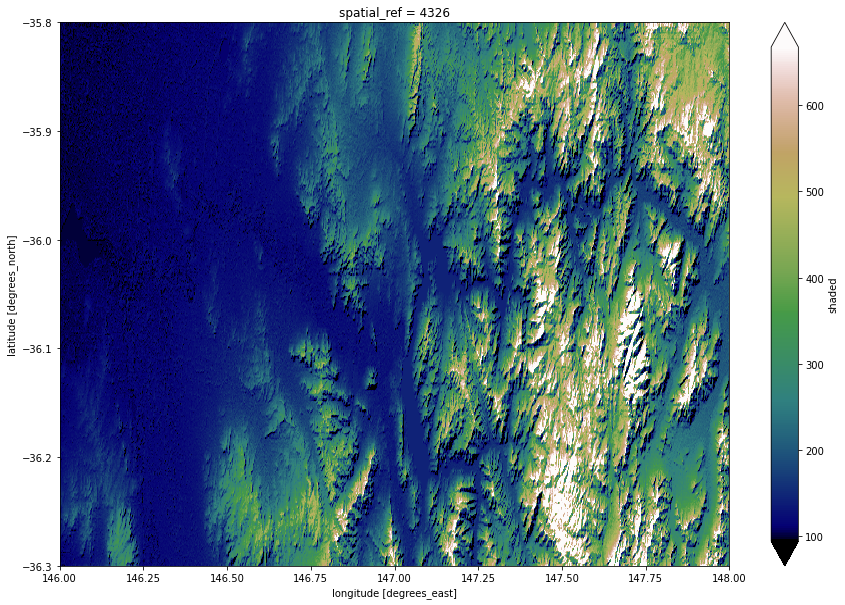

In [7]:
# Sample elevation array
elevation = data.elevation.isel(time=0).values

# Create hillsahde based on the array
ls = LightSource(azdeg=315, altdeg=45)
dyx = 10
shade = ls.hillshade(elevation, vert_exag=0.5, dx=dyx, dy=dyx, fraction=1.0)

# Modify the original elevation data to include shade
data['shaded'] = (['latitude', 'longitude'], elevation * shade)

# Plot using bilinear interpolation to remove artefacts
data.shaded.plot(size=10, robust=True, cmap="gist_earth")